# Data quality assessment
## What is the good quality data?
- Free from errors, inconsistencies, or outliers.
- Minimizes missing values. 

## Libraries

In [1]:
import time
import pandas as pd
import numpy as np
import re

import json
import os

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
# remove verison errors
import warnings
warnings.filterwarnings('ignore')

## Import CSV

### Raw data

In [2]:
path = 'repository/data_sources/Appendicitis.csv'
df = pd.read_csv(path)

In [3]:
df

,age,sex,height,body_weight,bmi,body_temperature,alcohol,exercise,smoking,WBC,...,Urine WBC,Urine RBC,Leukocytes,Urine Ketone,Urine Color,Urine Sugar,Urine Leukocytes,Urine Specific gravity,Target,Conditions
0,12,male,NaN,39.0,NaN,36.6,yes,yes,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Positive +1,NaN,1,มีอาการปวดกลางท้อง มีปวดท้องมากขึ้น ย้ายมาปว...
1,37,female,NaN,59.0,NaN,36.5,yes,yes,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Positive +2,NaN,1,มีอาการปวดท้องแน่นๆ ทั่วๆ เมื่อวานปวดท้องทั่วๆ...
2,28,female,NaN,NaN,NaN,37.1,yes,yes,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Positive +2,NaN,1,มีอาการปวดท้องด้านขวาและปวดท้องกลาง ปวดท้องกล...
3,36,female,161.0,43.0,16.589,NaN,yes,yes,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,ไม่มีปวดท้อง 2 วัน ปดหกลาง มีอาการย้ายมา rl...
4,19,female,165.0,46.0,16.896,37.1,yes,yes,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Positive +2,NaN,1,มีอาการปวดท้องข้างขวา ตรงกลาง มีปวดท้องเหนือ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,25,female,177.0,115.0,36.707,39.7,no,yes,no,16.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,ไม่มีปวดทั่วท้อง ไม่มีย้ายมาปวดขวาล่าง มีปว...
496,30,male,155.0,55.0,22.893,37.0,yes,yes,yes,NaN,...,Negative,Negative,NaN,Negative,Light yellow,NaN,NaN,1.004,0,ไม่มีปวดท้องกลาง ไม่มีอาการปวดท้องกลางสะดือ ...
497,26,male,155.0,64.4,26.805,37.3,yes,yes,no,NaN,...,Positive +1,Negative,Negative,NaN,NaN,NaN,Positive +1,NaN,0,ไม่มีปวดท้องข้างขวา ไม่มียังปวดท้องด้านขวา ป...
498,19,female,190.0,74.0,20.499,36.8,no,yes,no,NaN,...,Positive +1,Negative,Negative,Negative,Yellow,Negative,NaN,NaN,0,ไม่มีปวดกลางท้อง ไม่มีปวดท้องสะดือ ย้ายมาขวา...


In [4]:
df.columns

Index(['age', 'sex', 'height', 'body_weight', 'bmi', 'body_temperature',
       'alcohol', 'exercise', 'smoking', 'WBC', 'RBC', 'Neutrophil',
       'Lymphocytes', 'Urine WBC', 'Urine RBC', 'Leukocytes', 'Urine Ketone',
       'Urine Color', 'Urine Sugar', 'Urine Leukocytes',
       'Urine Specific gravity', 'Target', 'Conditions'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     500 non-null    int64  
 1   sex                     500 non-null    object 
 2   height                  356 non-null    float64
 3   body_weight             393 non-null    float64
 4   bmi                     338 non-null    float64
 5   body_temperature        455 non-null    float64
 6   alcohol                 500 non-null    object 
 7   exercise                500 non-null    object 
 8   smoking                 500 non-null    object 
 9   WBC                     203 non-null    float64
 10  RBC                     216 non-null    float64
 11  Neutrophil              157 non-null    float64
 12  Lymphocytes             158 non-null    float64
 13  Urine WBC               170 non-null    object 
 14  Urine RBC               168 non-null    ob

In [6]:
df.nunique()

age                        41
sex                         2
height                     66
body_weight               156
bmi                       304
body_temperature           43
alcohol                     2
exercise                    2
smoking                     2
WBC                       165
RBC                       132
Neutrophil                115
Lymphocytes               102
Urine WBC                   2
Urine RBC                   3
Leukocytes                  3
Urine Ketone                3
Urine Color                 4
Urine Sugar                 3
Urine Leukocytes            4
Urine Specific gravity     21
Target                      2
Conditions                500
dtype: int64

In [7]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,500.0,22.90,9.96,0.00,16.00,23.00,31.00,40.00
height,356.0,158.15,15.89,99.00,152.00,161.00,168.00,190.00
body_weight,393.0,61.97,16.35,31.00,50.50,59.00,70.00,133.00
bmi,338.0,23.01,5.30,11.85,19.14,22.37,25.78,39.68
body_temperature,455.0,36.94,0.80,35.10,36.50,36.80,37.10,40.00
WBC,203.0,9.54,5.17,0.01,6.80,8.92,13.12,27.50
RBC,216.0,4.40,1.67,0.00,4.10,4.86,5.30,7.95
Neutrophil,157.0,70.12,14.92,18.00,58.70,73.80,81.00,95.00
Lymphocytes,158.0,22.75,13.64,3.00,13.00,19.60,31.60,77.00
Urine Specific gravity,38.0,1.02,0.01,1.00,1.01,1.02,1.02,1.04


<AxesSubplot: >

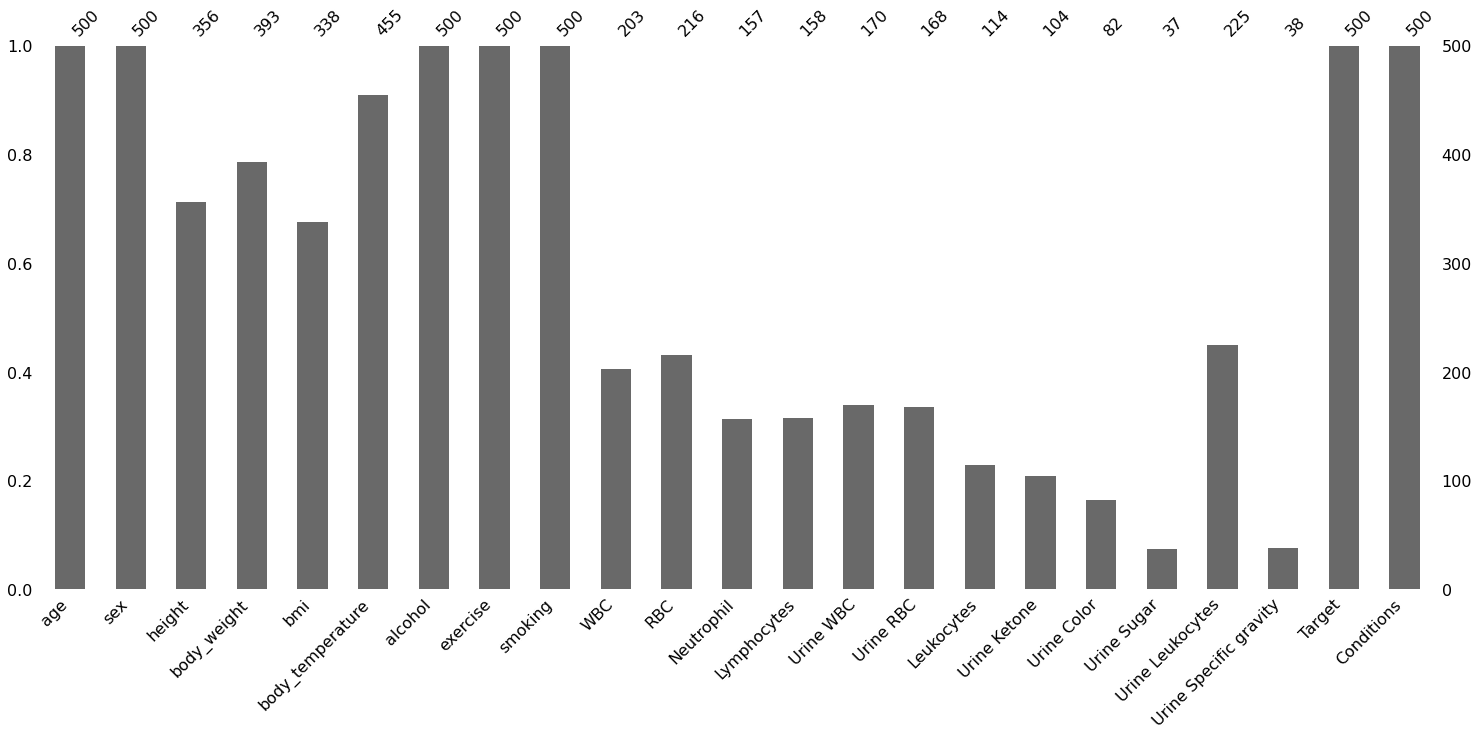

In [8]:
msno.bar(df)

In [9]:
missing_df = pd.DataFrame({'Missing Values': df.isna().sum().sort_values(ascending=False), 'Percentage Missing Values': (
    df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
missing_df


,Missing Values,Percentage Missing Values
Urine Sugar,463,92.6
Urine Specific gravity,462,92.4
Urine Color,418,83.6
Urine Ketone,396,79.2
Leukocytes,386,77.2
Neutrophil,343,68.6
Lymphocytes,342,68.4
Urine RBC,332,66.4
Urine WBC,330,66.0
WBC,297,59.4


In [11]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for inconsistencies
inconsistent_values = []
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values < 2:
        inconsistent_values.append(column)

print("Inconsistent Values:\n", inconsistent_values)


Missing Values:
 age                         0
sex                         0
height                    144
body_weight               107
bmi                       162
body_temperature           45
alcohol                     0
exercise                    0
smoking                     0
WBC                       297
RBC                       284
Neutrophil                343
Lymphocytes               342
Urine WBC                 330
Urine RBC                 332
Leukocytes                386
Urine Ketone              396
Urine Color               418
Urine Sugar               463
Urine Leukocytes          275
Urine Specific gravity    462
Target                      0
Conditions                  0
dtype: int64
Inconsistent Values:
 []


### High missing values

In [10]:
# Average missing
missing_df['Percentage Missing Values'].sum()/missing_df.shape[0]


41.61739130434783

<AxesSubplot: >

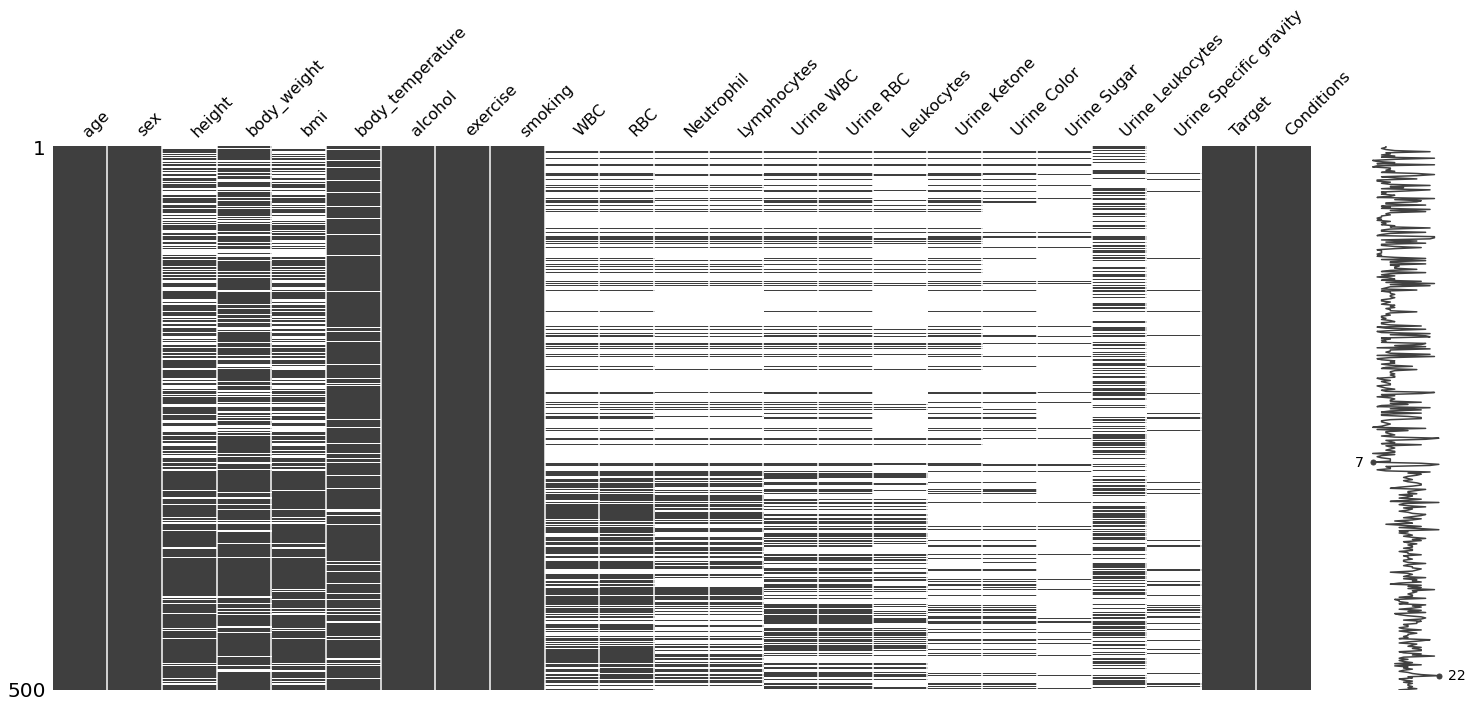

In [11]:
msno.matrix(df)

In [12]:
df.select_dtypes(include=np.number)

,age,height,body_weight,bmi,body_temperature,WBC,RBC,Neutrophil,Lymphocytes,Urine Specific gravity,Target
0,12,NaN,39.0,NaN,36.6,NaN,NaN,NaN,NaN,NaN,1
1,37,NaN,59.0,NaN,36.5,NaN,NaN,NaN,NaN,NaN,1
2,28,NaN,NaN,NaN,37.1,NaN,NaN,NaN,NaN,NaN,1
3,36,161.0,43.0,16.589,NaN,NaN,NaN,NaN,NaN,NaN,1
4,19,165.0,46.0,16.896,37.1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
495,25,177.0,115.0,36.707,39.7,16.83,5.20,93.0,5.0,NaN,0
496,30,155.0,55.0,22.893,37.0,NaN,NaN,NaN,NaN,1.004,0
497,26,155.0,64.4,26.805,37.3,NaN,NaN,NaN,NaN,NaN,0
498,19,190.0,74.0,20.499,36.8,NaN,NaN,NaN,NaN,NaN,0


## Missing values

In [13]:
(df.isna().sum()/df.shape[0]*100).round(2)

age                        0.0
sex                        0.0
height                    28.8
body_weight               21.4
bmi                       32.4
body_temperature           9.0
alcohol                    0.0
exercise                   0.0
smoking                    0.0
WBC                       59.4
RBC                       56.8
Neutrophil                68.6
Lymphocytes               68.4
Urine WBC                 66.0
Urine RBC                 66.4
Leukocytes                77.2
Urine Ketone              79.2
Urine Color               83.6
Urine Sugar               92.6
Urine Leukocytes          55.0
Urine Specific gravity    92.4
Target                     0.0
Conditions                 0.0
dtype: float64

## Duplication

In [14]:
df.duplicated().sum()

0